In [1]:
# importing required libraries
import pandas as pd                # for dataframe
import numpy as np                 # working with array
import matplotlib.pyplot as plt    # visualisation
import seaborn as sns              # visualisation
import warnings                    # for warnings
warnings.filterwarnings('ignore')  # ignore unnecessary warnings

In [2]:
# loading train dataset
house_train = pd.read_csv(r"C:\Users\sonus\Downloads\Project-Housing\Project-Housing_splitted\train.csv")

In [3]:
# loading top 5 rows of train dataset
house_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
# checking shape of train dataset
house_train.shape

(1168, 81)

In [5]:
# the dataset has 1168 rows and 80 columns

In [6]:
# since the id column contains different Id's so is not necessary and we can drop that

# dropping the Id column
house_train.drop('Id', axis = 1, inplace =True)

In [7]:
# checking shape of dataframe
house_train.shape

(1168, 80)

In [8]:
# loading top 5 rows
house_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

In [9]:
# from here we can see the Id column is dropped

###### Checking null values

In [10]:
# since there is 80 columns so finding the null values part by part with the help of indexing
# finding nul values from 0 to 20 columns
house_train.iloc[ : , 0:20].isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
dtype: int64

In [11]:
# finding null values from 20 to 40 columns
house_train.iloc[ : ,20:40].isnull().sum()

RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinSF1       0
BsmtFinType2    31
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

In [12]:
# finding null values from 40 to 60 columns
house_train.iloc[ : ,40:60].isnull().sum()

CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     551
GarageType       64
GarageYrBlt      64
GarageFinish     64
dtype: int64

In [13]:
# finding null values from 60 to last columns
house_train.iloc[ : ,60:].isnull().sum()

GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [14]:
# from the above findings we can see that there are some columns which contains a large number of null values and if we do the 
# work with them then the model will not work properly so we have to drop that columns.

# there are some columns which contains null values but in less numbers so we need to fill them

In [15]:
# dropping columns Alley, FireplaceQU, PoolQC, Fence, and MiscFeature
df = house_train.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [16]:
# checking the changes done in the dataset
df.shape

(1168, 75)

In [17]:
# we can see the columns are dropped

###### filling null values

In [18]:
# finding the data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [19]:
# filling the null values of column LotFrontage as it contains float data type so filling it with mean value
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [20]:
# filling the null values of column MasVnrType as it contains object data type so filling it with mode value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)

In [21]:
# filling the null values of column MasVnrArea as it contains float data type so filling it with mean value
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)

In [22]:
# filling the null values of column BsmtQual as it contains object data type so filling it with mode value
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)

In [23]:
# filling the null values of column BsmtCond as it contains object data type so filling it with mode value
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace = True)

In [24]:
# filling the null values of column BsmtExposure as it contains object data type so filling it with mode value
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)

In [25]:
# filling the null values of column BsmtFinType1 as it contains object data type so filling it with mode value
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace = True)

In [26]:
# filling the null values of column BsmtFinType2 as it contains object data type so filling it with mode value
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)

In [27]:
# filling the null values of column GarageType as it contains object data type so filling it with mode value
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace = True)

In [28]:
# filling the null values of column GarageYrBlt as it contains float data type so filling it with mean value
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)

In [29]:
# filling the null values of column GarageFinish as it contains object data type so filling it with mode value
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace = True)

In [30]:
# filling the null values of column GarageQual as it contains object data type so filling it with mode value
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace = True)

In [31]:
# filling the null values of column GarageCond as it contains object data type so filling it with mode value
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace = True)

In [32]:
# checking the changes applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [33]:
# from here we can see all null values are filled

##### Statistics Summary

In [38]:
# checking the statistical summary of data
describe = df.describe()

In [39]:
# as the data contains more number of columns so loadig the summary using slicing
describe.iloc[ : , 0:11]

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260   
std      30.145255     20.785185   182.047152   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  
count  1168.000000  
mean    569.721747  
std     449.375525  
min       0.000000  
25%     216.000000  
50%     474.000000  
75%     816.000000  
max    2336.000000

In [40]:
describe.iloc[ : , 11:22]

TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   1061.095034  1169.860445   348.826199      6.380137  1525.066781   
std     442.272249   391.161983   439.696370     50.892844   528.042957   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     799.000000   892.000000     0.000000      0.000000  1143.250000   
50%    1005.500000  1096.500000     0.000000      0.000000  1468.500000   
75%    1291.500000  1392.000000   729.000000      0.000000  1795.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1168.000000   1168.000000  1168.000000  1168.000000   1168.000000   
mean       0.425514      0.055651     1.562500     0.388699      2.884418   
std        0.521615      0.236699     0.551882     0.504929      0.817229   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  
count   1168.000000  
mean       1.045377  
std        0.216292  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        3.000000

In [41]:
describe.iloc[ : , 22:]

TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean       6.542808     0.617295  1978.193841     1.776541   476.860445   
std        1.598484     0.650575    24.198559     0.745554   214.466769   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1962.000000     1.000000   338.000000   
50%        6.000000     1.000000  1978.193841     2.000000   480.000000   
75%        7.000000     1.000000  2001.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000

Observations:
    
    1. Many columns have mean is greater than median.
    
    2. certain columns have large difference between 75th percentile and maximum value.
    
    3. From above observations we can say that there are outliers present in certain columns.
    
    4. Standard deviation in certain columns are very high.

##### Correlation

In [42]:
# cehcking correlation of other variables with Saleprice
corr = df.corr()

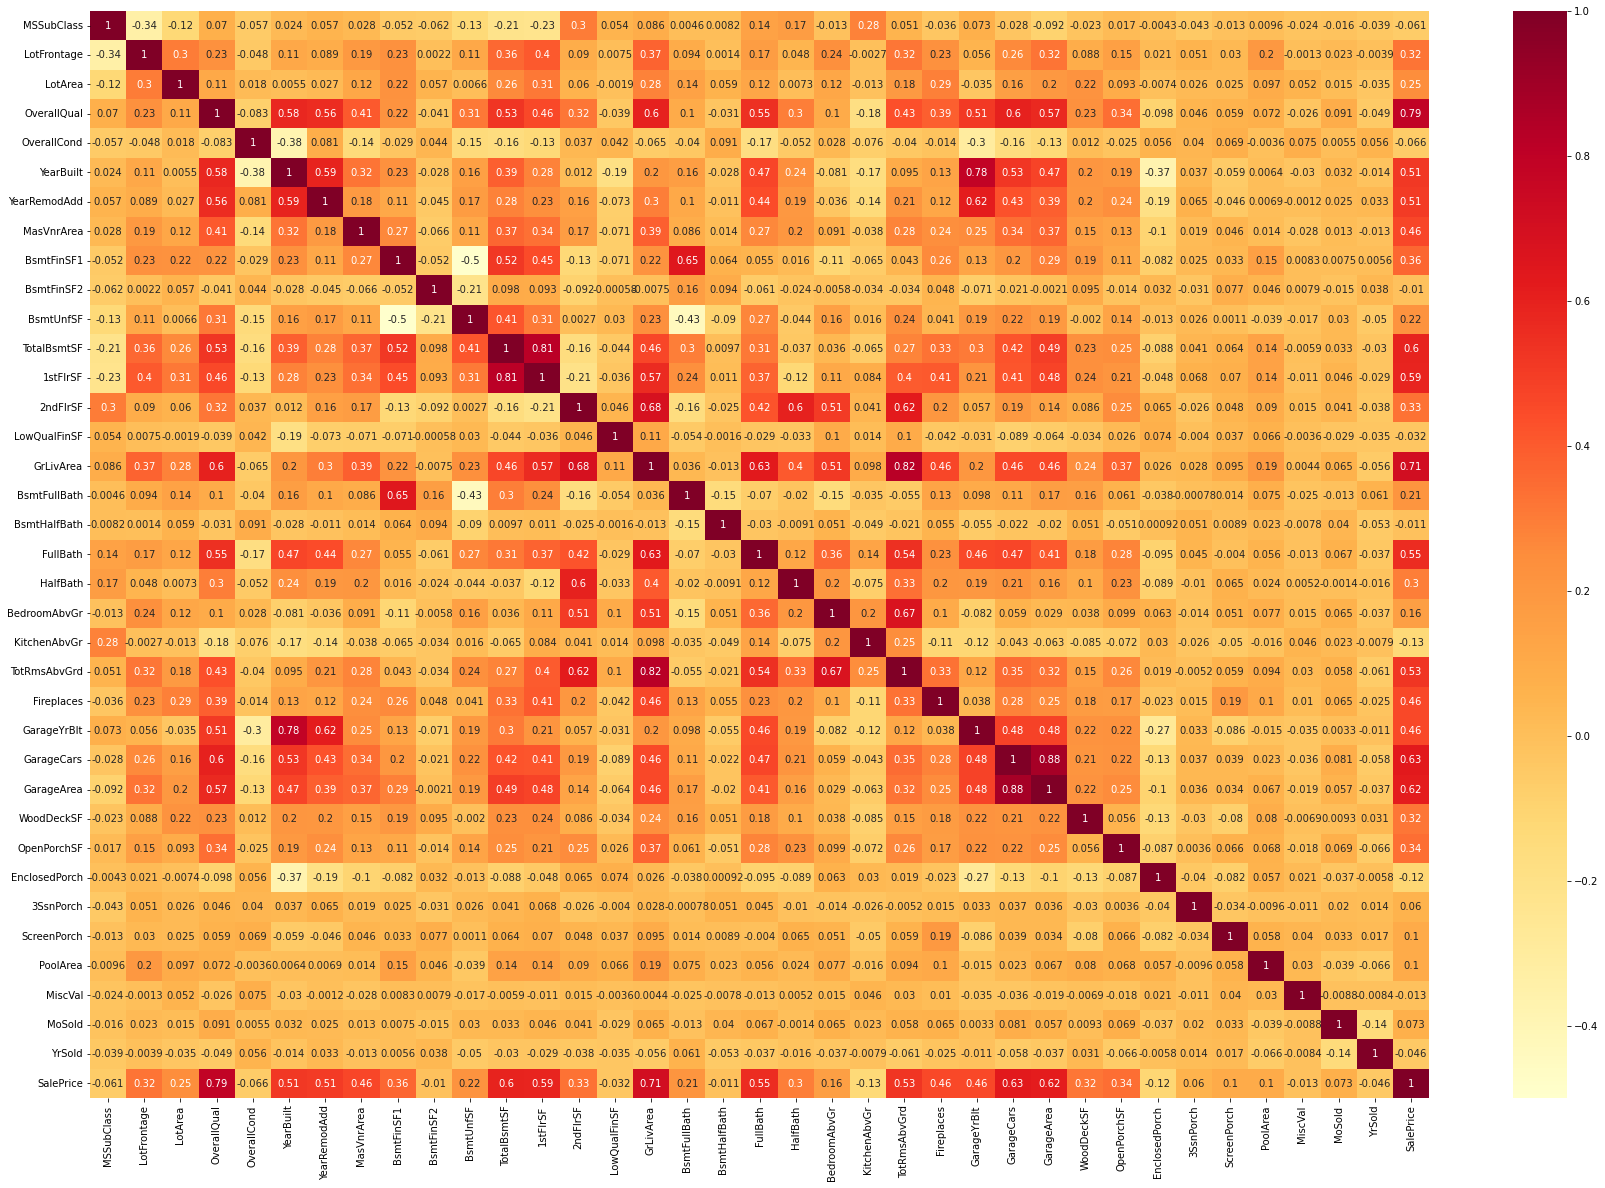

In [43]:
# putting it onto heatmap for better understanding
#plt.title('Correlation between SalePrice and others')
plt.figure(figsize = (30,20))
sns.heatmap(corr, cmap = 'YlOrRd', annot = True)
plt.savefig('corr.jpg')
plt.show()

Observations:
    
    Here we can see the boxes with darker shades are positively correlated with each other.
    
    There are certain variables which are highly postive correlated with SalePrice i.e. they make a large impacted on SalePrice.
    
    Certain variables are less positively correlated with SalePrice.
    
    Certain variables are negative correlated with SalePrice.

In [44]:
# we can drop the columns which have negative correlation with SalePrice

In [45]:
# dropping columns MSSubClass, OverallCond, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, MiscVal, YrSold
# as these are negative correlated to SalePrice.
df.drop(columns = ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold'], axis = 1, inplace = True)

In [46]:
# checking the shape of Dataframe
df.shape

(1168, 66)

In [47]:
# here we can see 9 columns are dropped

##### Plotting outliers

In [48]:
# checking column names
df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice

<AxesSubplot:>

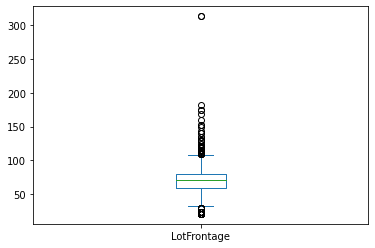

In [49]:
df['LotFrontage'].plot.box()

<AxesSubplot:>

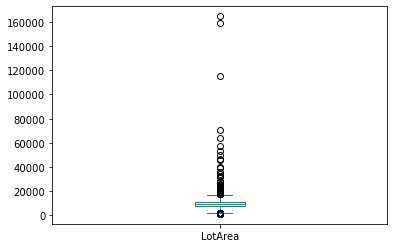

In [50]:
df['LotArea'].plot.box()

<AxesSubplot:>

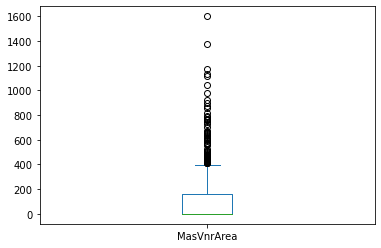

In [51]:
df['MasVnrArea'].plot.box()

<AxesSubplot:>

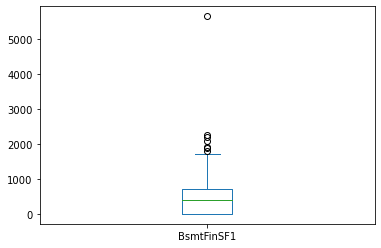

In [52]:
df['BsmtFinSF1'].plot.box()

<AxesSubplot:>

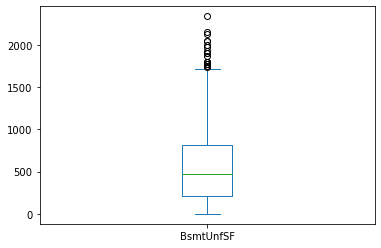

In [53]:
df['BsmtUnfSF'].plot.box()

<AxesSubplot:>

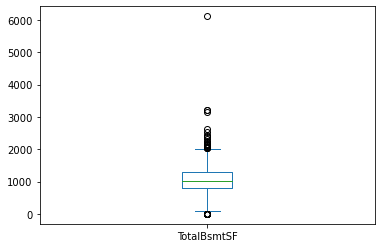

In [54]:
df['TotalBsmtSF'].plot.box()

<AxesSubplot:>

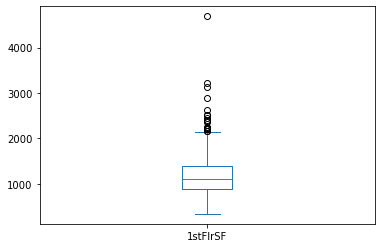

In [55]:
df['1stFlrSF'].plot.box()

<AxesSubplot:>

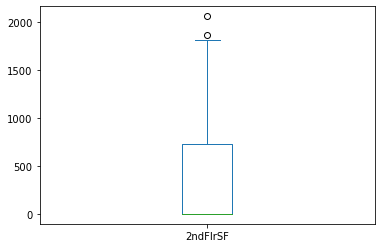

In [56]:
df['2ndFlrSF'].plot.box()

<AxesSubplot:>

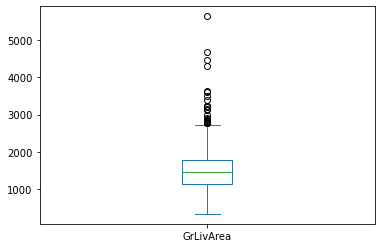

In [57]:
df['GrLivArea'].plot.box()

<AxesSubplot:>

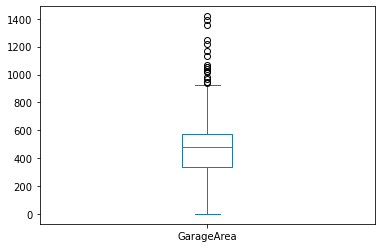

In [58]:
df['GarageArea'].plot.box()

<AxesSubplot:>

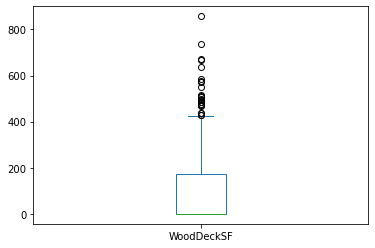

In [59]:
df['WoodDeckSF'].plot.box()

<AxesSubplot:>

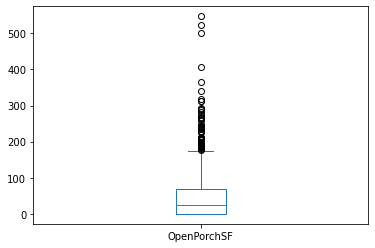

In [60]:
df['OpenPorchSF'].plot.box()

<AxesSubplot:>

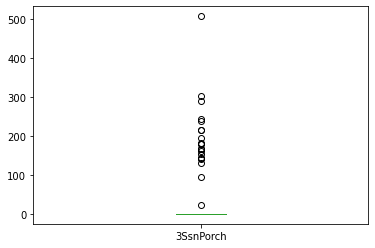

In [61]:
df['3SsnPorch'].plot.box()

<AxesSubplot:>

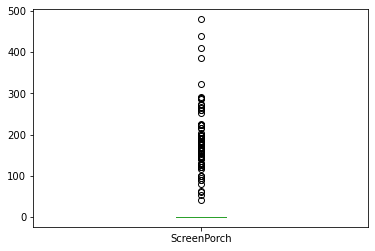

In [62]:
df['ScreenPorch'].plot.box()

<AxesSubplot:>

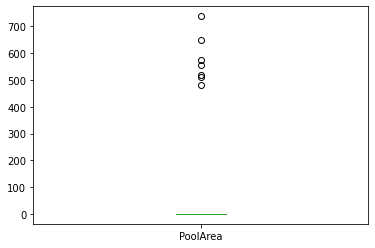

In [63]:
df['PoolArea'].plot.box()

Observations:
    
    From the above observations we can see that the following columns contains a very large number of outliers as compare to
    the usable data.

    3SsnPorch, ScreenPorch, PoolArea
    
    The best way to handle with them is to drop these columns.
    
    The other columns contains outliers too but we can handle them.

In [64]:
# dropping the columns which contains that much number of outliers
df.drop(columns = ['3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1, inplace = True)

In [65]:
# checking shape of dataframe
df.shape

(1168, 63)

In [66]:
# from here we can see 3 columns are dropped as previously it contains 66 columns

##### Handling Outliers

In [67]:
# importing required library
from scipy.stats import zscore

In [68]:
# as our dataset contains string as well as numeric data so storing all the numeric columns in a variable
num = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold']

In [69]:
# finding zscore of values and storing them into a variable
zsc = np.abs(zscore(df[num]))

In [70]:
# checking top 5 rows
zsc.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0     0.000000  0.620616     0.075169   0.168236      0.421565    0.562238   
1     1.070631  0.600903     1.364138   0.030885      0.710356    0.562238   
2     0.936867  0.063075     0.644484   0.831975      0.589202    0.562238   
3     1.516514  0.141424     0.075169   0.201423      0.373434    2.075571   
4     0.000000  0.686902     0.075169   0.201423      0.733598    0.130186   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  HalfBath  BedroomAbvGr  \
0    0.702161   0.864410     0.038239  0.541850  ...  0.770138      1.082679   
1    0.202665   1.053642     2.614679  2.678144  ...  0.770138      1.365664   
2    0.902279   0.700654     0.126458  0.109619  ...  1.211186      0.141492   
3    0.562795   1.267363     1.770946  1.724166  ...  0.770138      0.141492   
4    1.732609   0.475801     1.223537  1.105232  ...  0.770138      0.141492   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0      0.965583    0.588509     0.049356     0.29985    0.171944    0.762907   
1      0.911999    0.588509     0.338754     0.29985    0.672371    0.120585   
2      0.911999    0.588509     0.777493     0.29985    0.101973    0.664476   
3      0.286138    0.588509     0.049356     0.29985    0.322517    0.762907   
4      0.911999    0.588509     0.049356     0.29985    0.243217    1.140270   

   OpenPorchSF    MoSold  
0     2.387850  1.617822  
1     2.417992  1.361470  
2     1.257525  0.128176  
3     1.136957  1.990233  
4     0.701705  0.128176  

[5 rows x 24 columns]

In [71]:
# checking shape of data
zsc.shape

(1168, 24)

In [72]:
# as it is large number of data so it is difficult to find the zscore greater than 3
# defining threshold to find the values position which have zscore greater than 3

In [73]:
# making threshold and finding the outliers
threshold = 3
np.where(zsc>3)

(array([  23,   32,   32,   40,   48,   51,   68,   93,  103,  103,  103,
         106,  113,  119,  119,  119,  119,  140,  141,  141,  141,  141,
         141,  141,  142,  142,  151,  152,  191,  192,  192,  192,  195,
         211,  211,  232,  232,  232,  241,  241,  241,  243,  245,  245,
         259,  273,  299,  303,  305,  305,  305,  305,  309,  310,  325,
         338,  352,  355,  356,  361,  361,  361,  361,  361,  361,  361,
         378,  378,  380,  381,  394,  403,  423,  434,  441,  449,  452,
         483,  483,  483,  490,  495,  500,  504,  504,  504,  517,  517,
         523,  525,  544,  561,  561,  572,  574,  581,  592,  592,  592,
         592,  592,  592,  592,  592,  592,  592,  592,  592,  600,  600,
         608,  614,  614,  614,  622,  626,  626,  626,  639,  644,  644,
         655,  664,  681,  683,  689,  691,  691,  691,  691,  691,  695,
         695,  697,  697,  707,  711,  713,  720,  736,  746,  757,  757,
         758,  762,  762,  762,  762, 

In [74]:
# here the 1st array contains row number and 2nd array contains column number of dataset which defines the position of value
# which is an outlier

In [75]:
# removing the outlier and making new dataframe
new_df = df[(zsc<3).all(axis = 1)]

In [76]:
# checking shape of new dataframe
new_df.shape

(1041, 63)

In [77]:
# checking shape of old dataframe
df.shape

(1168, 63)

In [78]:
# here we can see about 100 rows are removed which contains outliers now we have a clean dataset
# this will used to buit our model

#### Data Visualization

In [79]:
# here we have one target column i.e. saleprice

In [80]:
# comparing the other column data and checking which effect sales price and how

In [81]:
# holding dependent and independent columns in a variable so this will make it easy to plot data
dep = new_df['SalePrice']
i = new_df.columns
ind = i[0:-1]

In [82]:
# checking length of the independent variable
len(ind)

62

In [83]:
# using scatterplot for numerical and swarmplot for category visualization

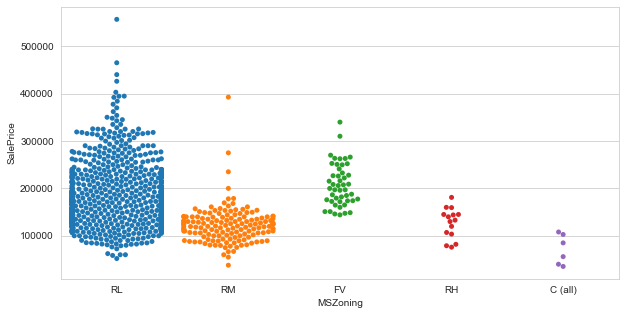

In [84]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[0], dep, data = new_df)
plt.savefig('0.jpg')

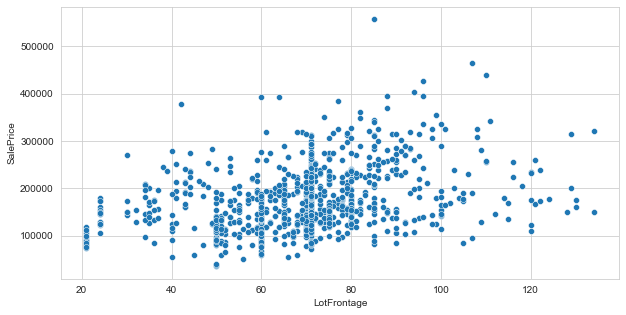

In [85]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[1], dep, data = new_df)
plt.savefig('1.jpg')

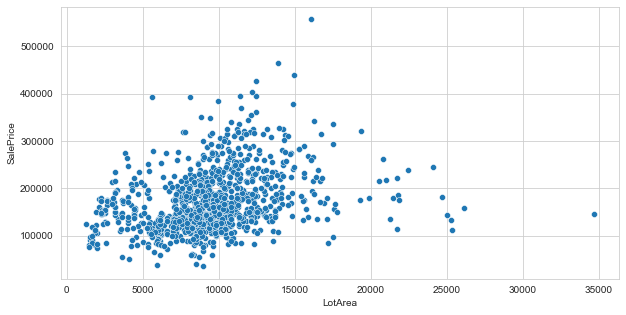

In [86]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[2], dep, data = new_df)
plt.savefig('2.jpg')

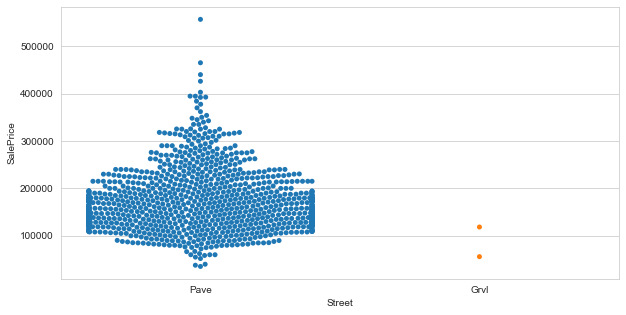

In [87]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[3], dep, data = new_df)
plt.savefig('3.jpg')

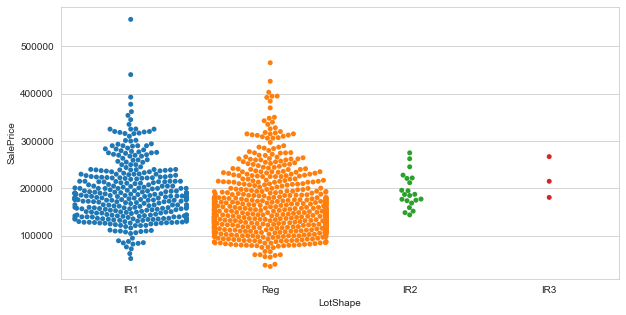

In [88]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[4], dep, data = new_df)
plt.savefig('4.jpg')

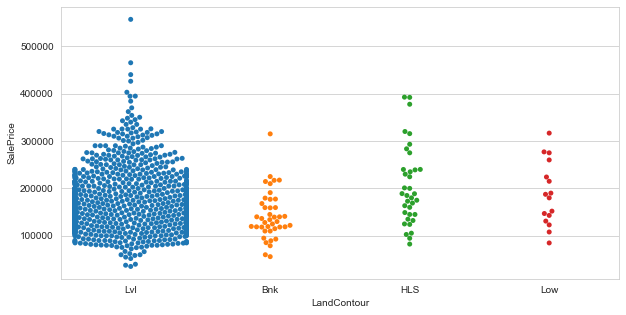

In [89]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[5], dep, data = new_df)
plt.savefig('5.jpg')

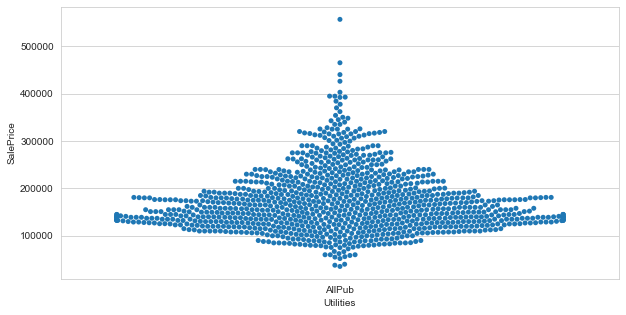

In [90]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[6], dep, data = new_df)
plt.savefig('6.jpg')

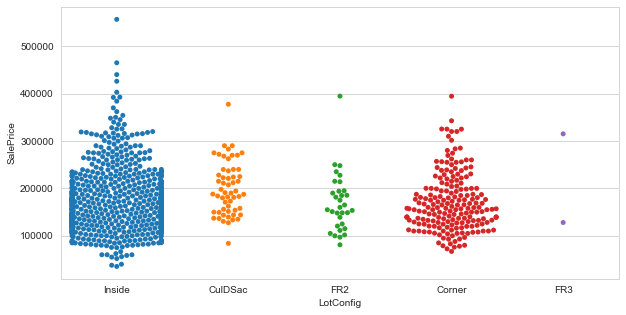

In [91]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[7], dep, data = new_df)
plt.savefig('7.jpg')

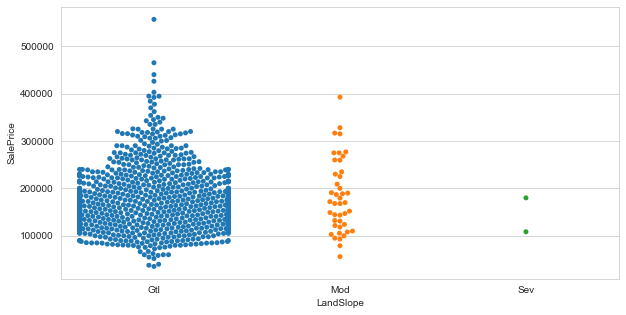

In [92]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[8], dep, data = new_df)
plt.savefig('8.jpg')

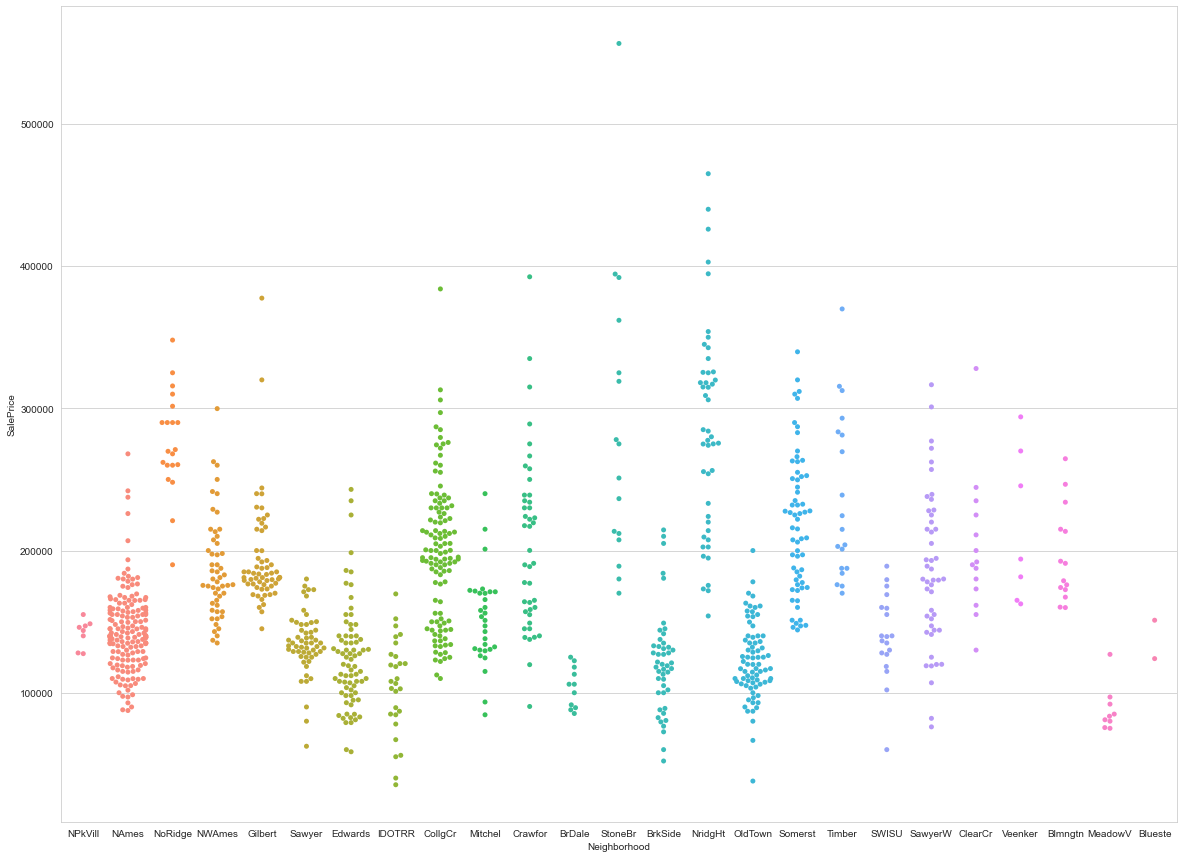

In [93]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20,15)
sns.swarmplot(ind[9], dep, data = new_df)
plt.savefig('9.jpg')

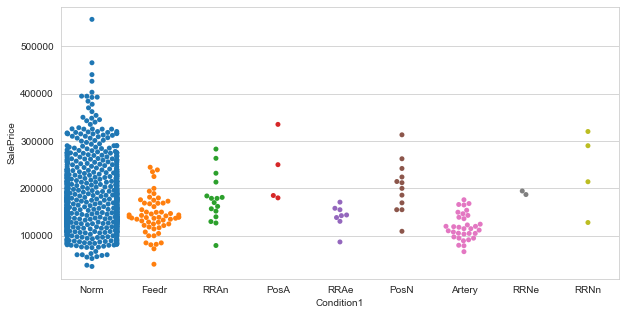

In [94]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[10], dep, data = new_df)
plt.savefig('10.jpg')

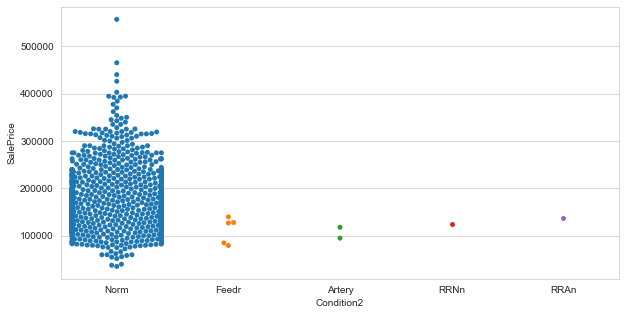

In [95]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[11], dep, data = new_df)
plt.savefig('11.jpg')

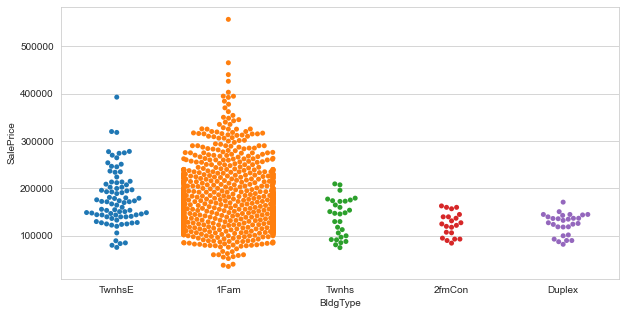

In [96]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[12], dep, data = new_df)
plt.savefig('12.jpg')

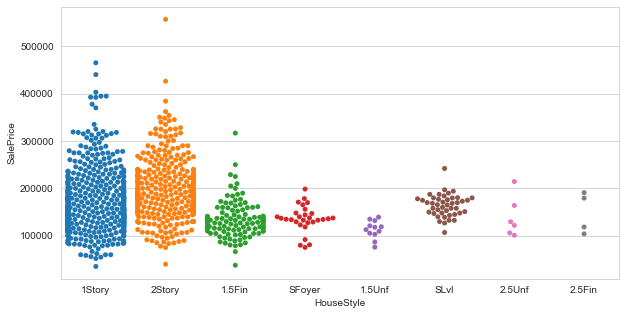

In [97]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[13], dep, data = new_df)
plt.savefig('13.jpg')

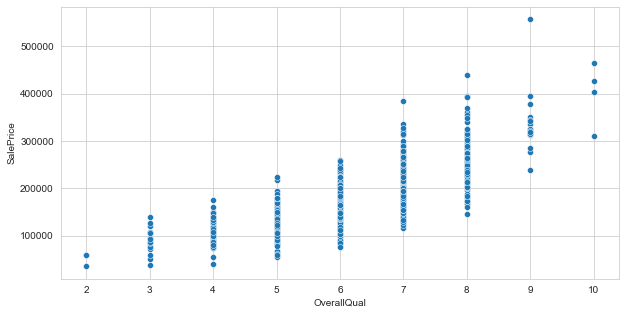

In [98]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[14], dep, data = new_df)
plt.savefig('14.jpg')

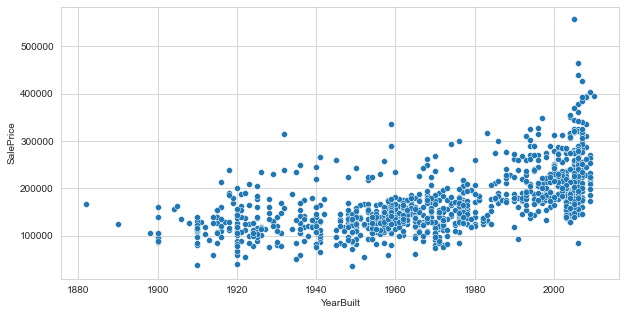

In [99]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[15], dep, data = new_df)
plt.savefig('15.jpg')

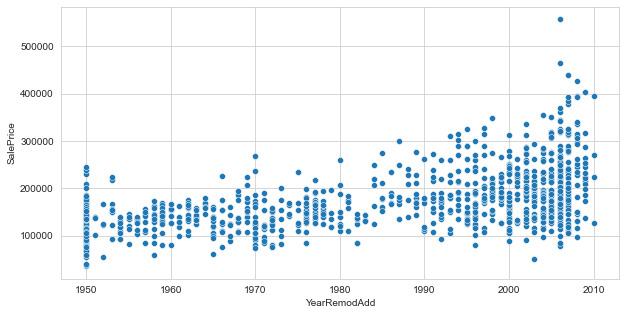

In [100]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[16], dep, data = new_df)
plt.savefig('16.jpg')

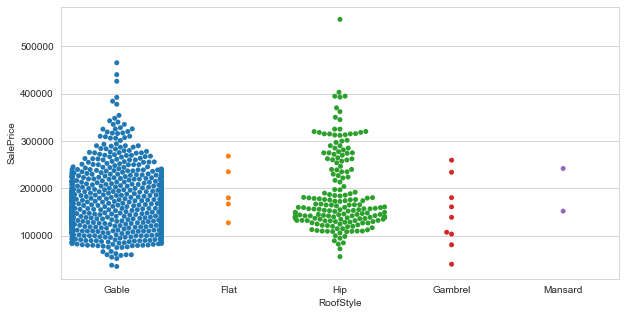

In [101]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[17], dep, data = new_df)
plt.savefig('17.jpg')

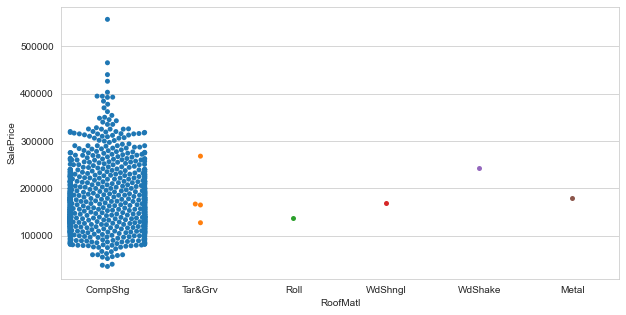

In [102]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[18], dep, data = new_df)
plt.savefig('18.jpg')

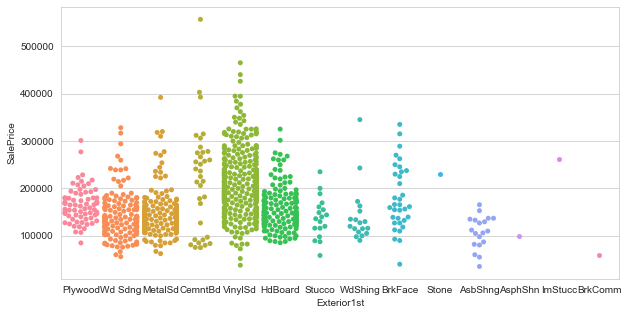

In [103]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[19], dep, data = new_df)
plt.savefig('19.jpg')

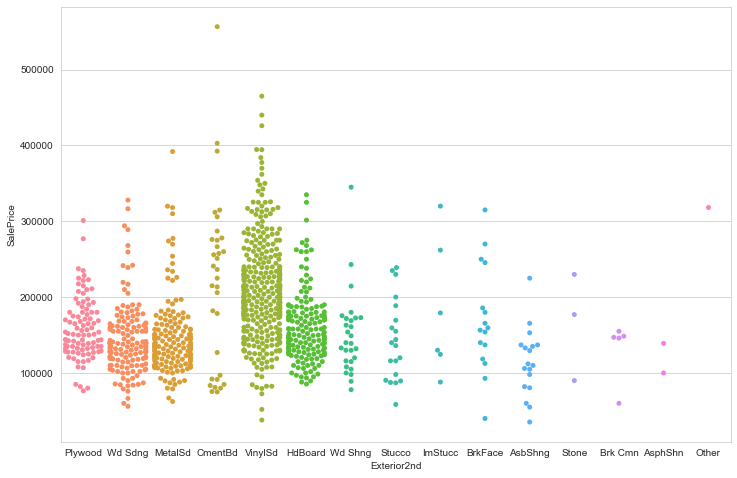

In [104]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,8)
sns.swarmplot(ind[20], dep, data = new_df)
plt.savefig('20.jpg')

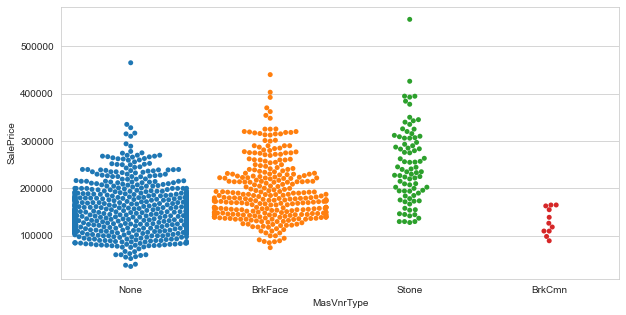

In [105]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[21], dep, data = new_df)
plt.savefig('21.jpg')

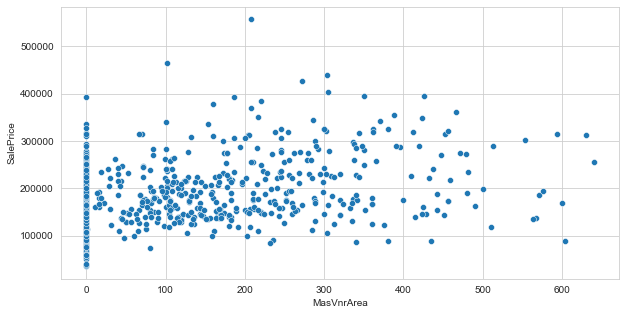

In [106]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[22], dep, data = new_df)
plt.savefig('22.jpg')

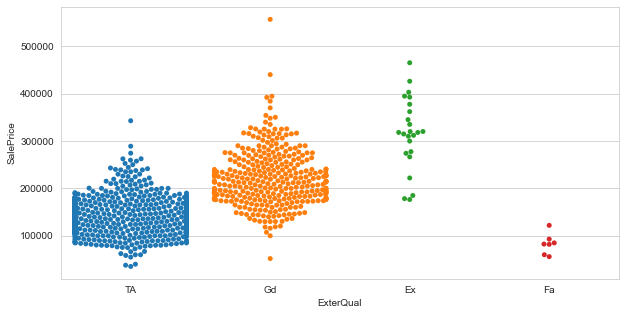

In [107]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[23], dep, data = new_df)
plt.savefig('23.jpg')

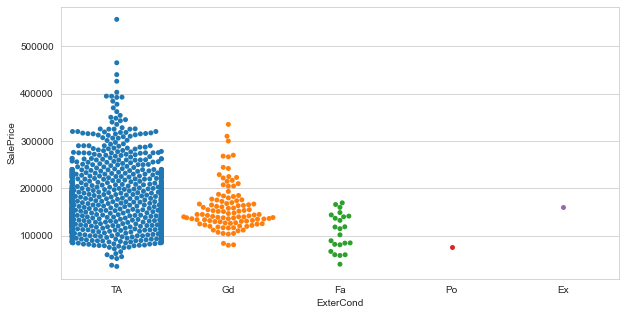

In [108]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[24], dep, data = new_df)
plt.savefig('24.jpg')

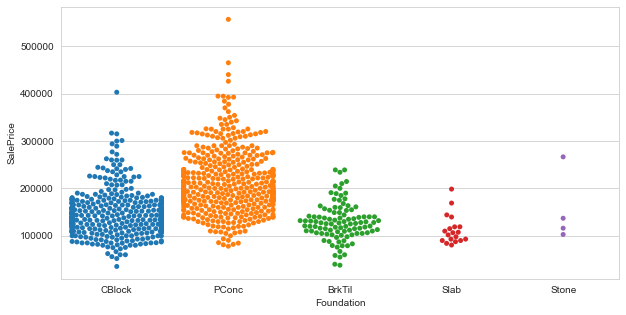

In [109]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[25], dep, data = new_df)
plt.savefig('25.jpg')

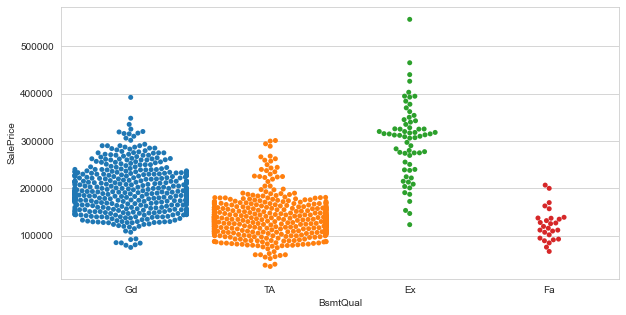

In [110]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[26], dep, data = new_df)
plt.savefig('26.jpg')

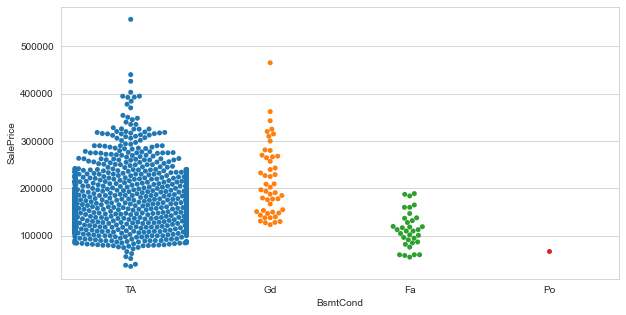

In [111]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[27], dep, data = new_df)
plt.savefig('27.jpg')

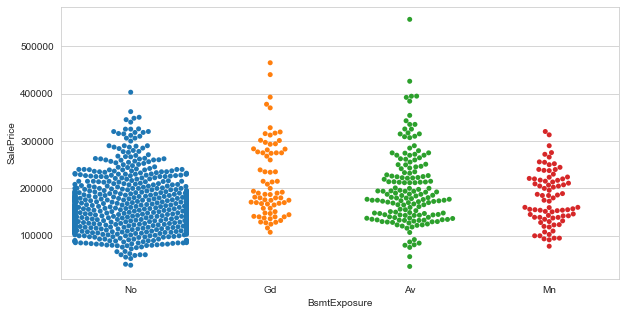

In [112]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[28], dep, data = new_df)
plt.savefig('28.jpg')

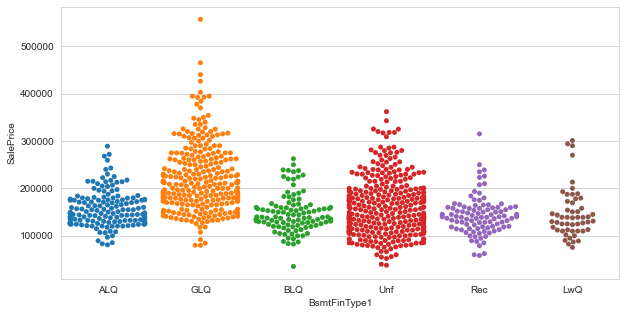

In [113]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[29], dep, data = new_df)
plt.savefig('29.jpg')

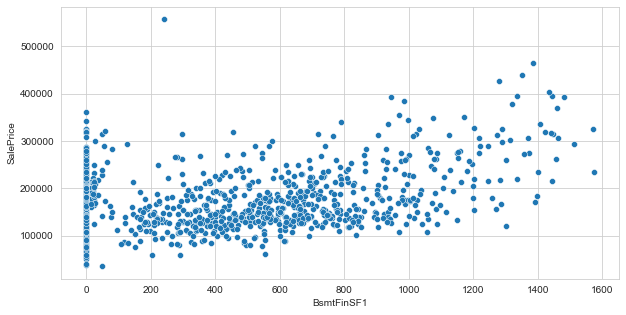

In [114]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[30], dep, data = new_df)
plt.savefig('30.jpg')

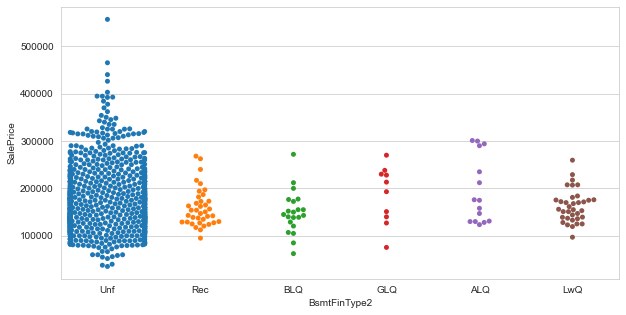

In [115]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[31], dep, data = new_df)
plt.savefig('31.jpg')

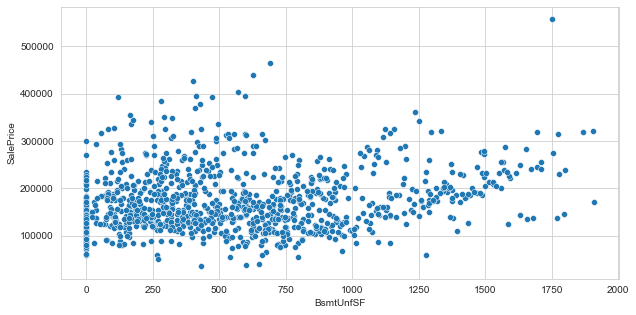

In [116]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[32], dep, data = new_df)
plt.savefig('32.jpg')

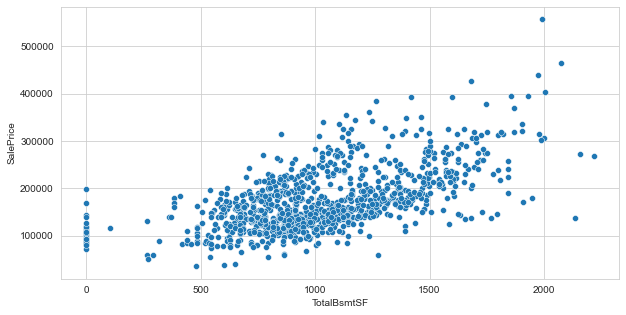

In [117]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[33], dep, data = new_df)
plt.savefig('33.jpg')

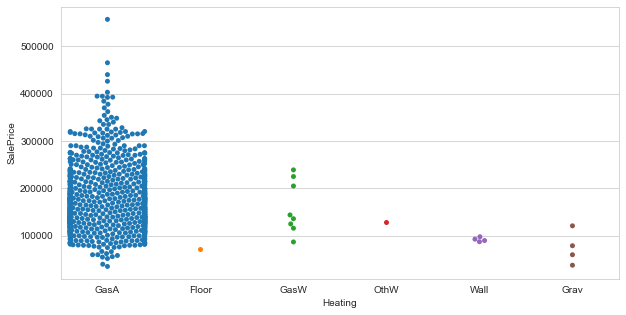

In [118]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[34], dep, data = new_df)
plt.savefig('34.jpg')

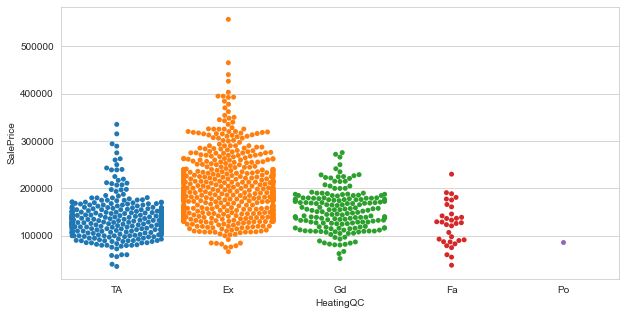

In [119]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[35], dep, data = new_df)
plt.savefig('35.jpg')

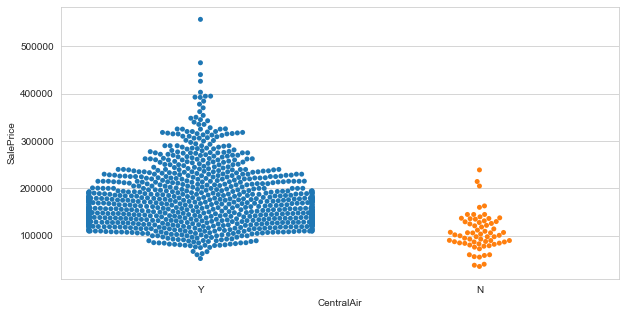

In [120]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[36], dep, data = new_df)
plt.savefig('36.jpg')

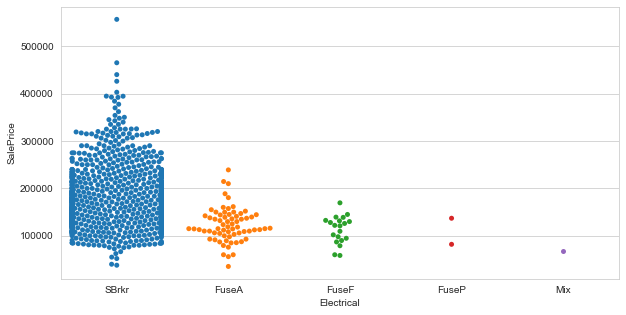

In [121]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[37], dep, data = new_df)
plt.savefig('37.jpg')

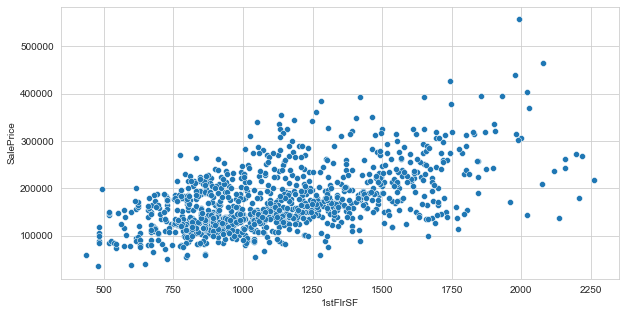

In [122]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[38], dep, data = new_df)
plt.savefig('38.jpg')

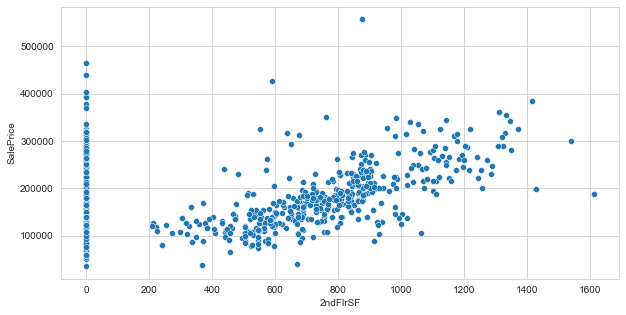

In [123]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[39], dep, data = new_df)
plt.savefig('39.jpg')

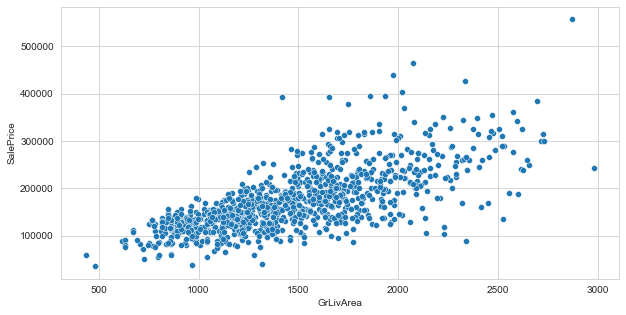

In [124]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[40], dep, data = new_df)
plt.savefig('40.jpg')

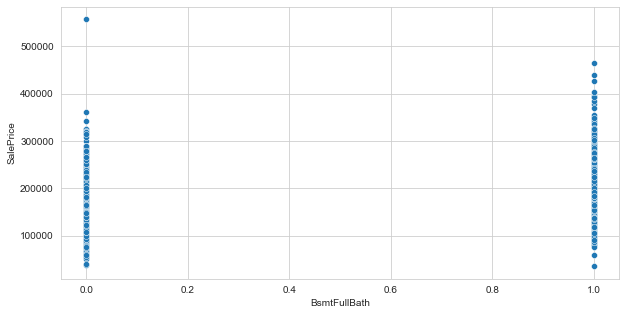

In [125]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[41], dep, data = new_df)
plt.savefig('41.jpg')

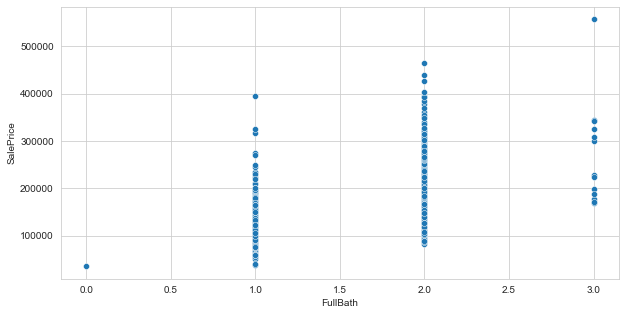

In [126]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[42], dep, data = new_df)
plt.savefig('42.jpg')

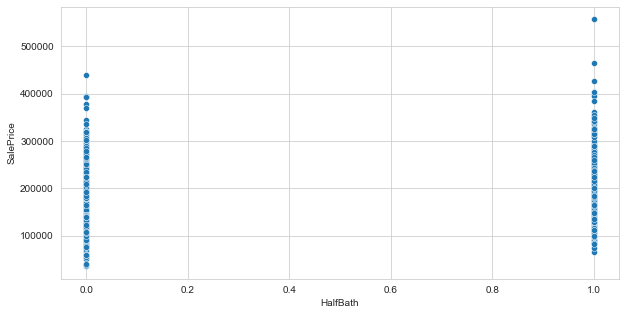

In [127]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[43], dep, data = new_df)
plt.savefig('43.jpg')

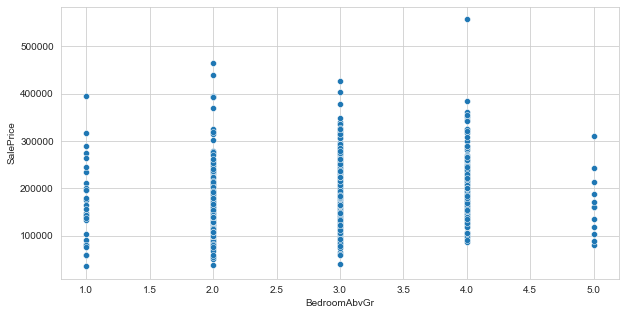

In [128]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[44], dep, data = new_df)
plt.savefig('44.jpg')

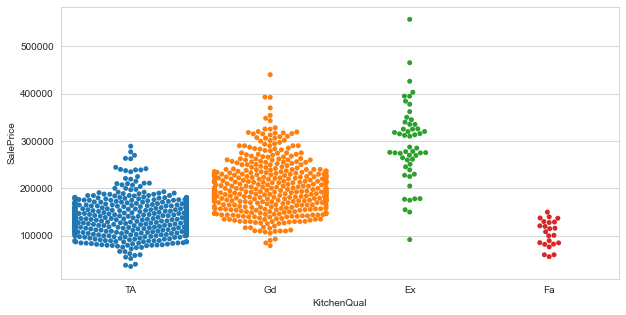

In [129]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[45], dep, data = new_df)
plt.savefig('45.jpg')

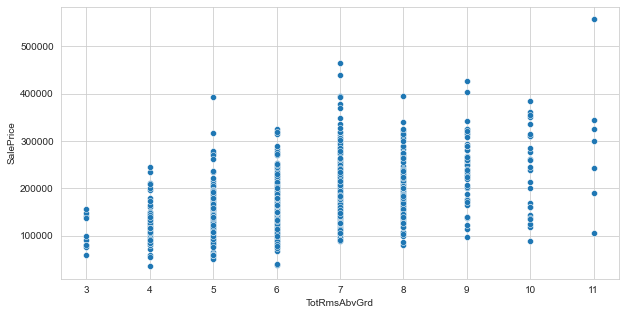

In [130]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[46], dep, data = new_df)
plt.savefig('46.jpg')

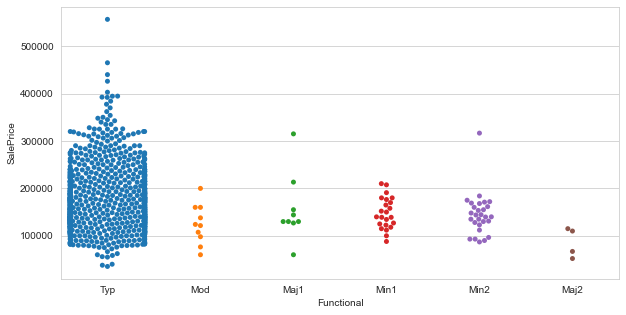

In [131]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[47], dep, data = new_df)
plt.savefig('47.jpg')

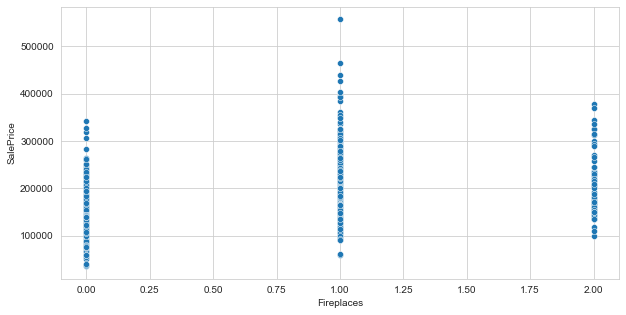

In [132]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[48], dep, data = new_df)
plt.savefig('48.jpg')

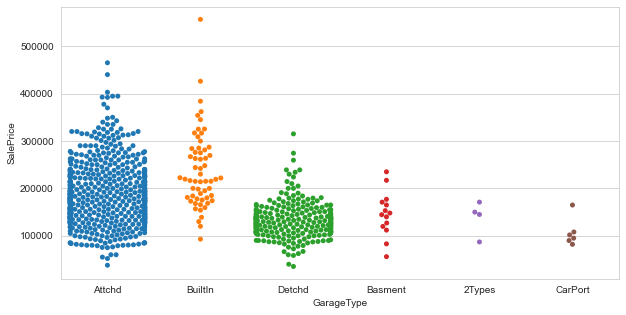

In [133]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[49], dep, data = new_df)
plt.savefig('49.jpg')

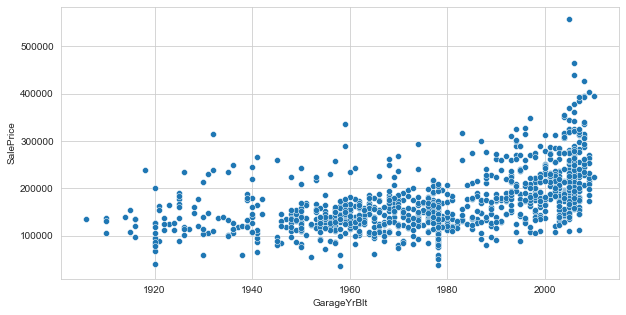

In [134]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[50], dep, data = new_df)
plt.savefig('50.jpg')

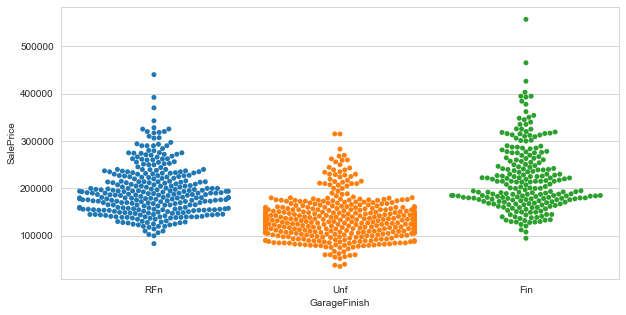

In [135]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[51], dep, data = new_df)
plt.savefig('51.jpg')

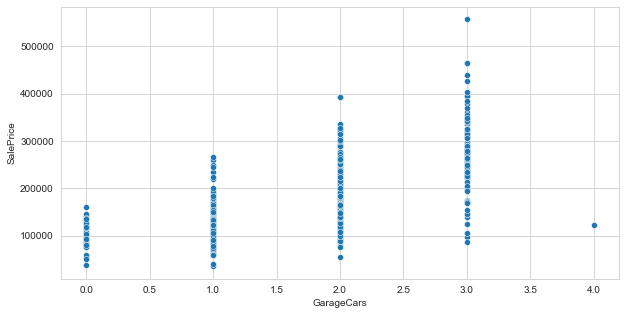

In [136]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[52], dep, data = new_df)
plt.savefig('52.jpg')

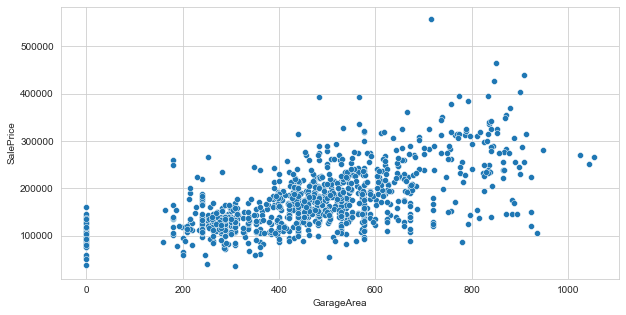

In [137]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[53], dep, data = new_df)
plt.savefig('53.jpg')

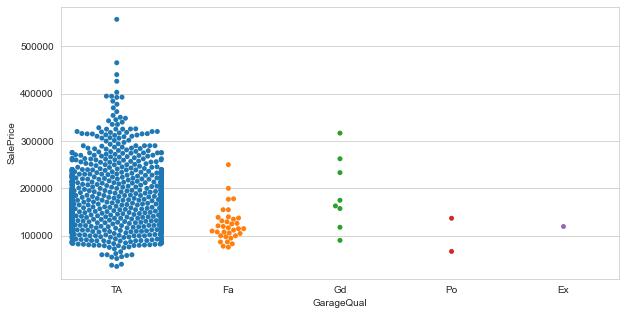

In [138]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[54], dep, data = new_df)
plt.savefig('54.jpg')

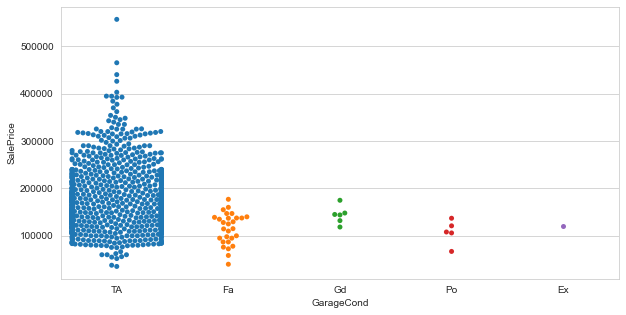

In [139]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[55], dep, data = new_df)
plt.savefig('55.jpg')

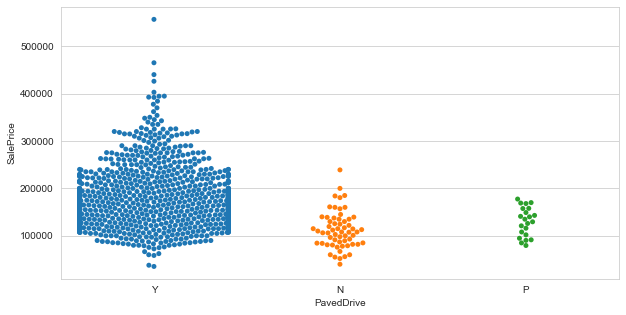

In [140]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[56], dep, data = new_df)
plt.savefig('56.jpg')

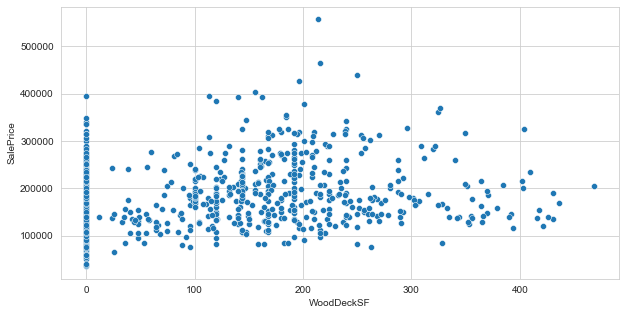

In [141]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[57], dep, data = new_df)
plt.savefig('57.jpg')

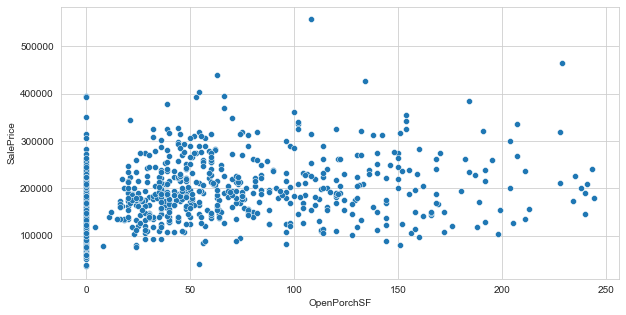

In [142]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[58], dep, data = new_df)
plt.savefig('58.jpg')

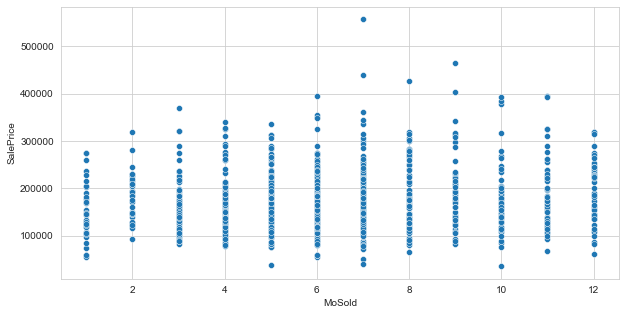

In [143]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[59], dep, data = new_df)
plt.savefig('59.jpg')

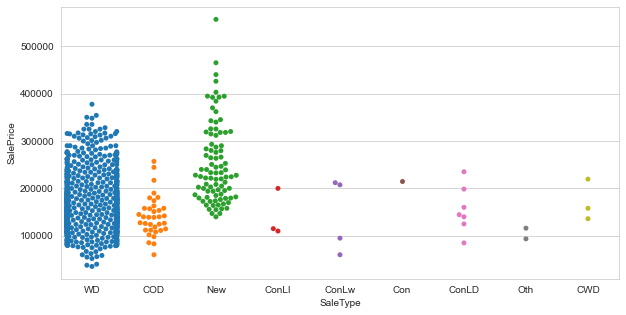

In [144]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot(ind[60], dep, data = new_df)
plt.savefig('60.jpg')

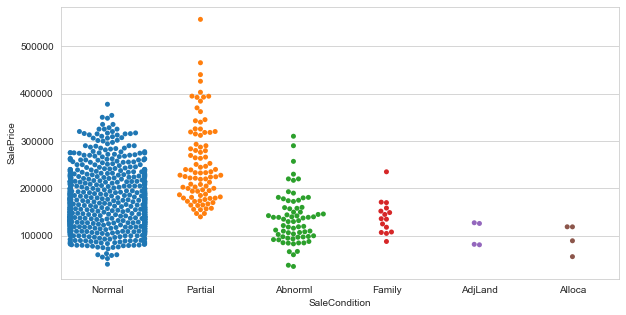

In [145]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.swarmplot( ind[61], dep, data = new_df)
plt.savefig('61.jpg')

Observations:
    
    When Linear feet connected to street increases house price increases.
    
    When lot size increases little bit house price increases.
    
    99% of houses have Paved type road access
    
    All houses have all utilities.
    
    Most houses have gentle slope.
    
    Most houses have Single famility detached dwelling.
    
    House prices increases when quality increases.
    
    Newly built houses have little more price.
    
    Remodeled houses have little more price.
    
    House prices little increases when Masonry veneer area increases.
    
    House prices increases when type 1 finished square feet area increases.
    
    House Price increases when total square feet of basement area increases. 

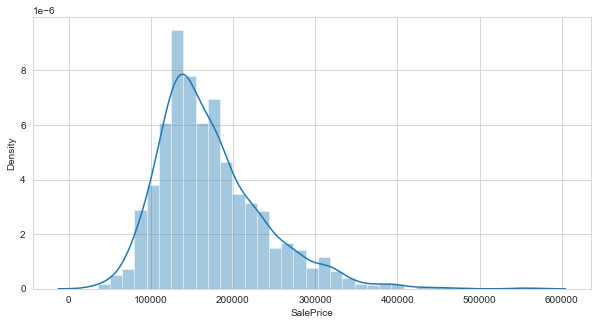

In [148]:
# checking the ditribution of SalePrice
sns.distplot(new_df['SalePrice'])
plt.savefig('62.jpg')

In [149]:
# from here we can see that the most of the house prices are between 1 to 2 lakh dollars